In [39]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split

from wrangle import (get_pokemon, prepare_pokemon, train_validate_test, get_object_cols, get_numeric_X_cols, ready_for_battle,
pokemon_split, split_X_y, standard_scale_data)

from explore import get_pokemon_heatmap, explore_univariate, histplot, count_and_histplots, scatterplot, create_cluster, create_scatter_plot, make_cluster, inertia

from sklearn.metrics import accuracy_score
import sklearn.metrics
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.tree import export_graphviz
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [2]:
df = get_pokemon()

In [3]:
df = ready_for_battle(df)

In [4]:
df.shape

(1045, 57)

In [5]:
df = df.drop(columns=['catch_rate'])

In [6]:
def pokemon_split(df):
    #splitting our data
    train_validate, test = train_test_split(df, test_size=.2, 
                                        random_state=123, 
                                        stratify=df.simplified_catch_rate)
    train, validate = train_test_split(train_validate, test_size=.3, 
                                   random_state=123, 
                                   stratify=train_validate.simplified_catch_rate)
    return train, validate, test

In [7]:
train, validate, test = pokemon_split(df)

In [8]:
train.shape, validate.shape, test.shape

((585, 56), (251, 56), (209, 56))

In [9]:
X_train, y_train, X_validate, y_validate, X_test, y_test = split_X_y(train, validate, test, 'simplified_catch_rate')

<AxesSubplot:title={'center':'Features Correlated with Catch Rates'}>

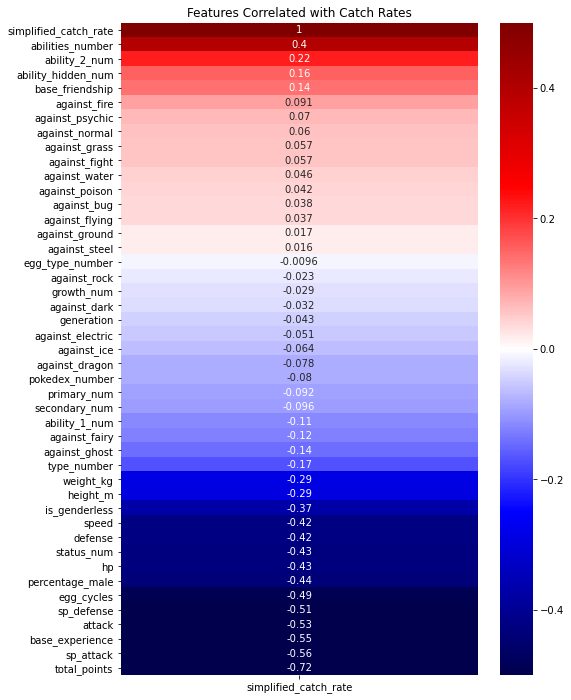

In [10]:
get_pokemon_heatmap(train)

In [11]:
univariate_stuff = train[['total_points','sp_attack','base_experience','attack','hp','sp_defense','egg_cycles','percentage_male','is_genderless','abilities_number']]

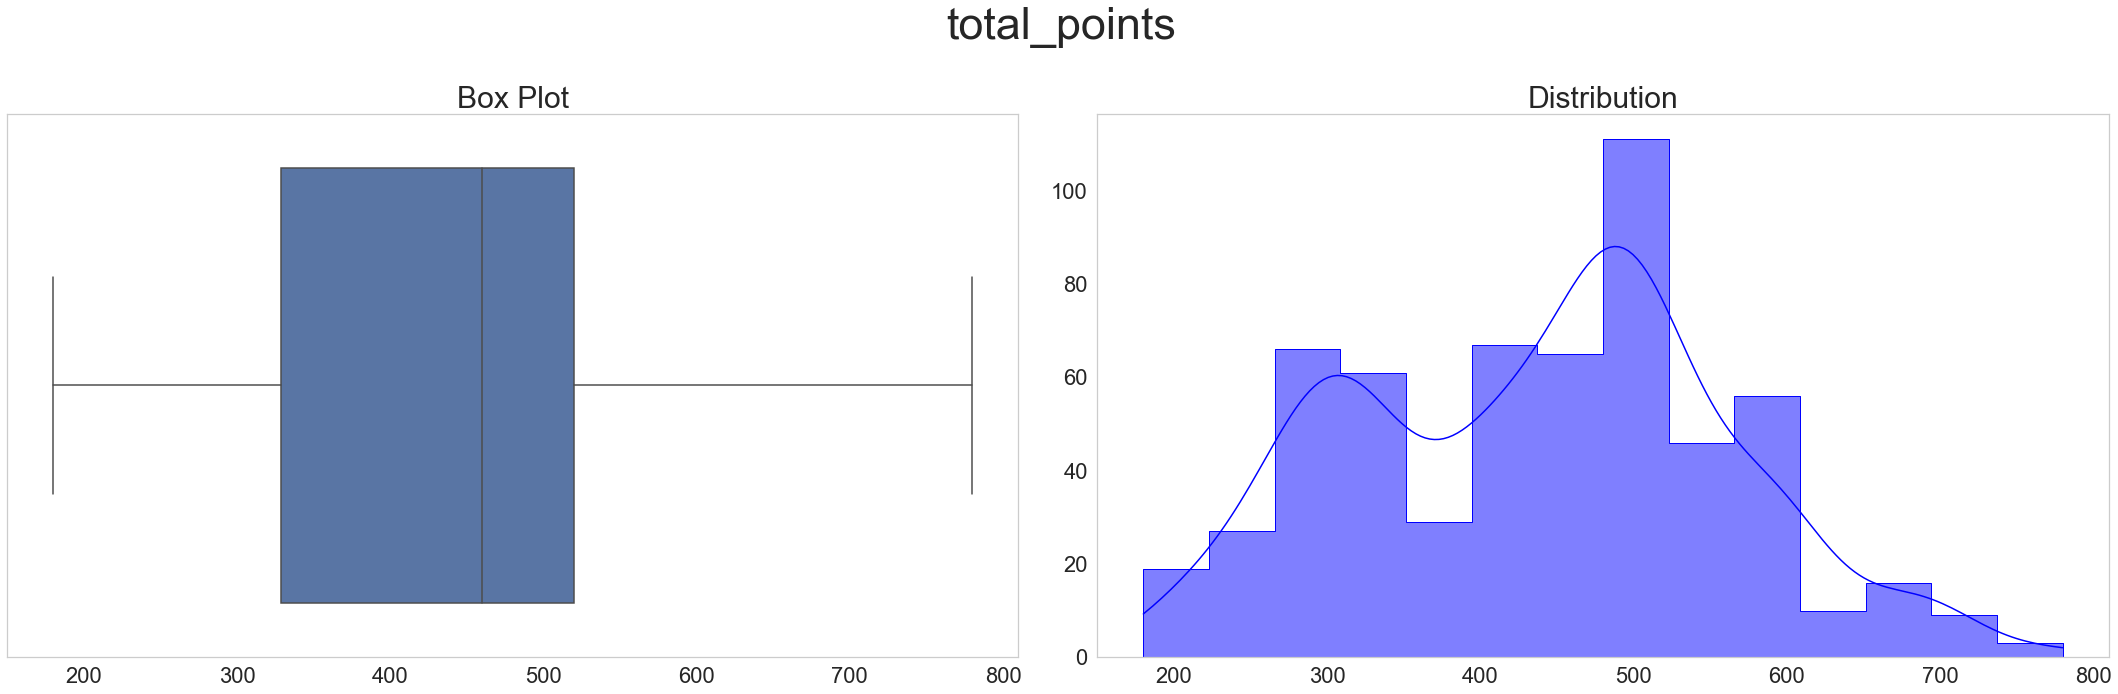

Summary Statistics for total_points
count    585.000000
mean     438.733333
std      122.910860
min      180.000000
25%      329.000000
50%      460.000000
75%      520.000000
max      780.000000
Name: total_points, dtype: float64


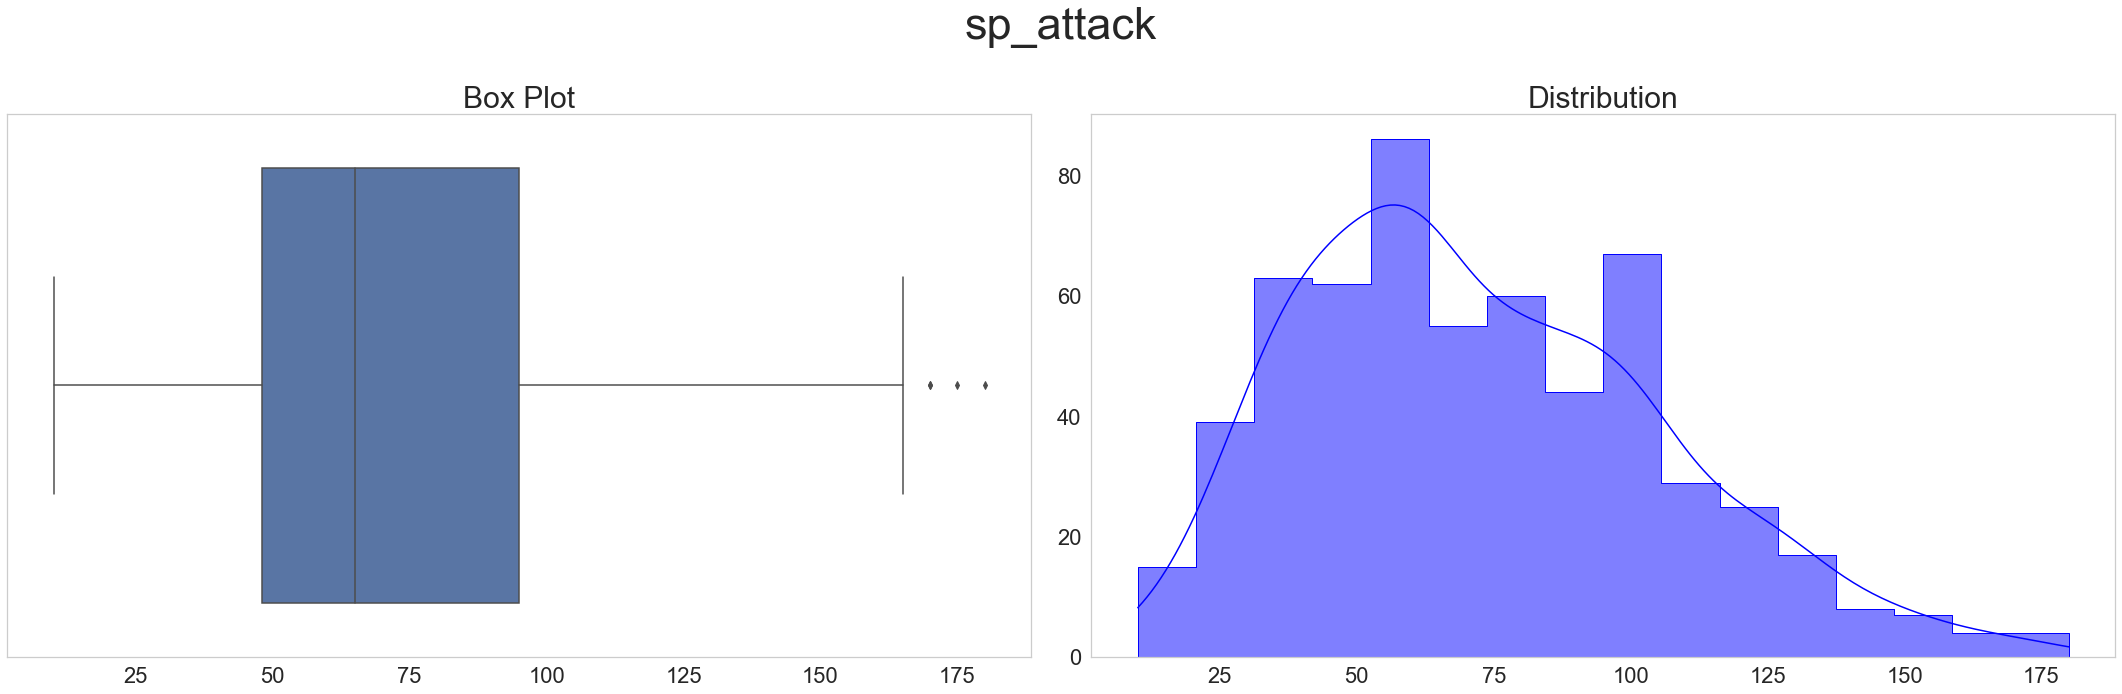

Summary Statistics for sp_attack
count    585.000000
mean      72.933333
std       33.184427
min       10.000000
25%       48.000000
50%       65.000000
75%       95.000000
max      180.000000
Name: sp_attack, dtype: float64


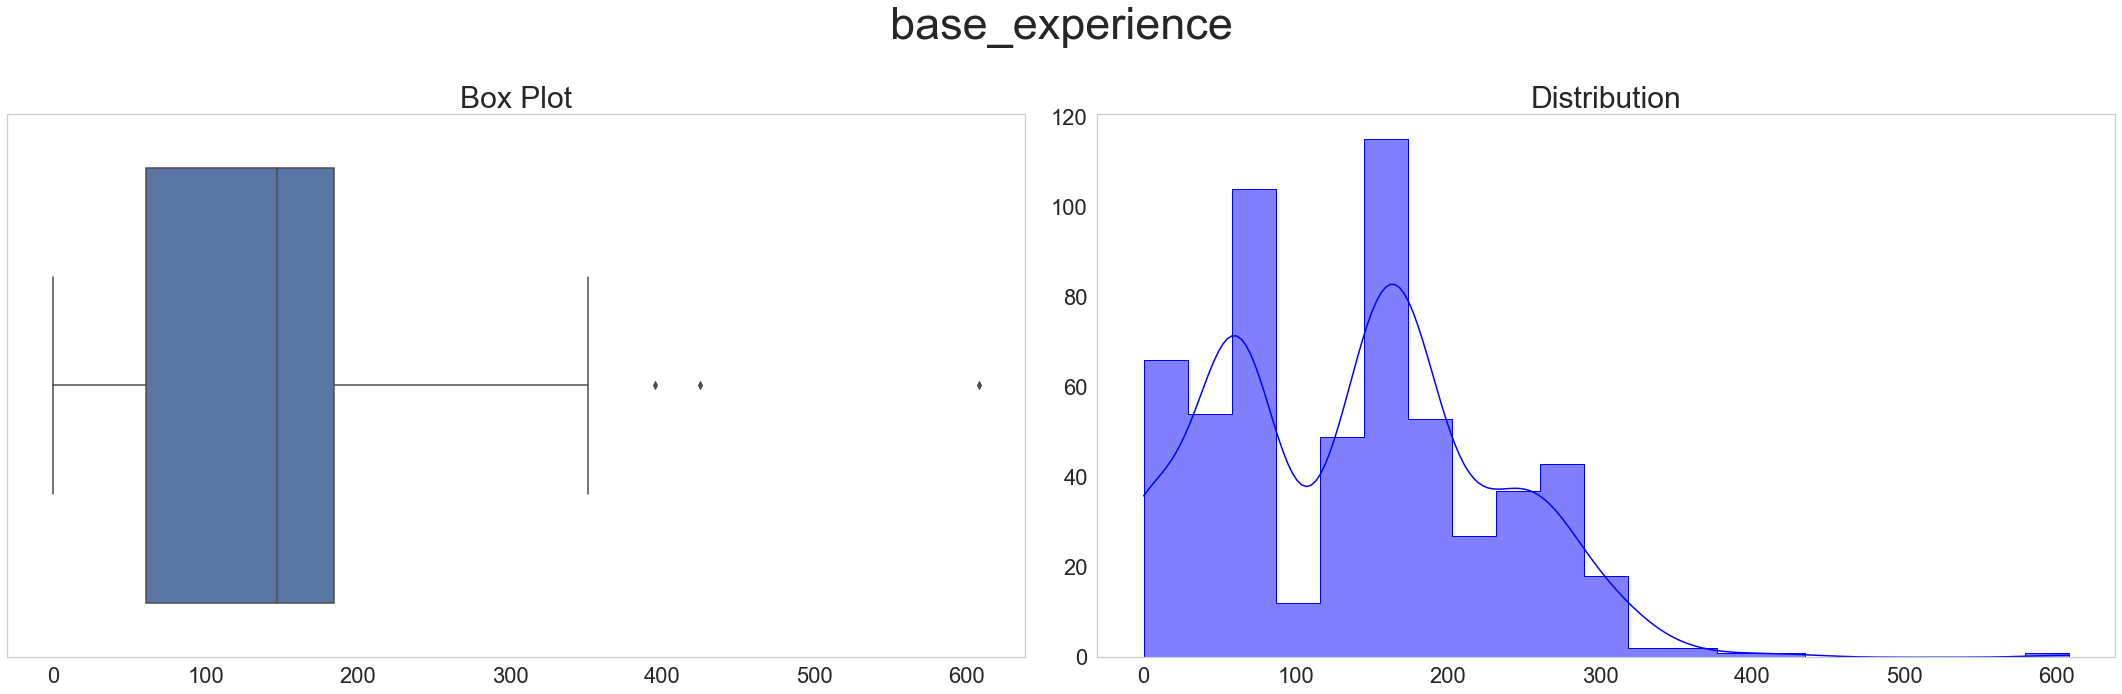

Summary Statistics for base_experience
count    585.000000
mean     137.369231
std       90.803606
min        0.000000
25%       61.000000
50%      147.000000
75%      184.000000
max      608.000000
Name: base_experience, dtype: float64


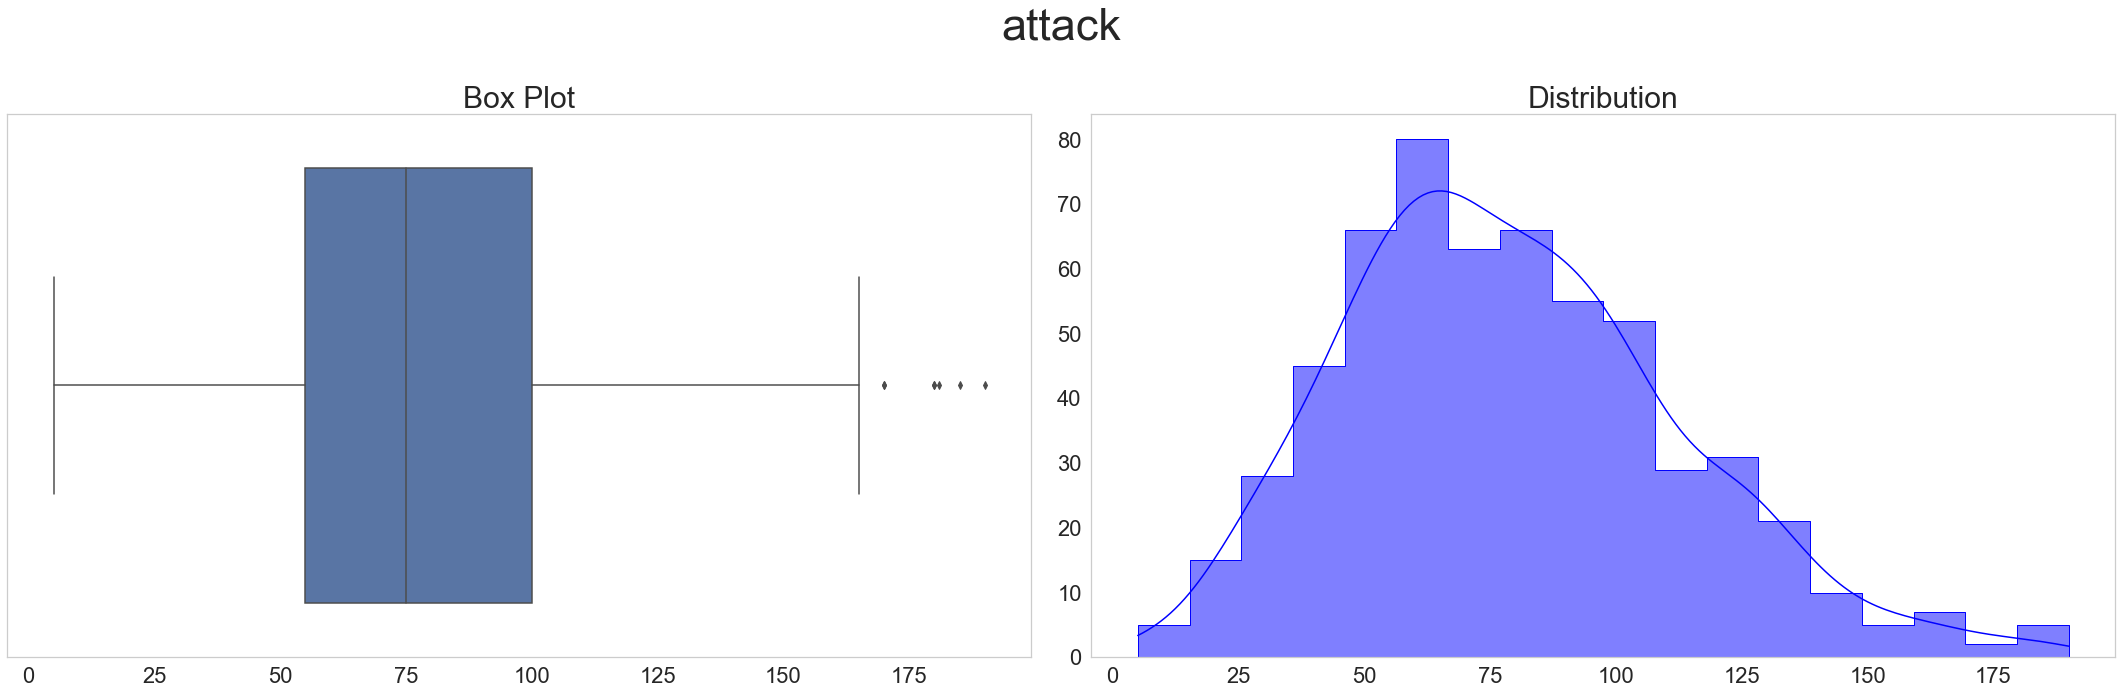

Summary Statistics for attack
count    585.000000
mean      79.203419
std       33.174786
min        5.000000
25%       55.000000
50%       75.000000
75%      100.000000
max      190.000000
Name: attack, dtype: float64


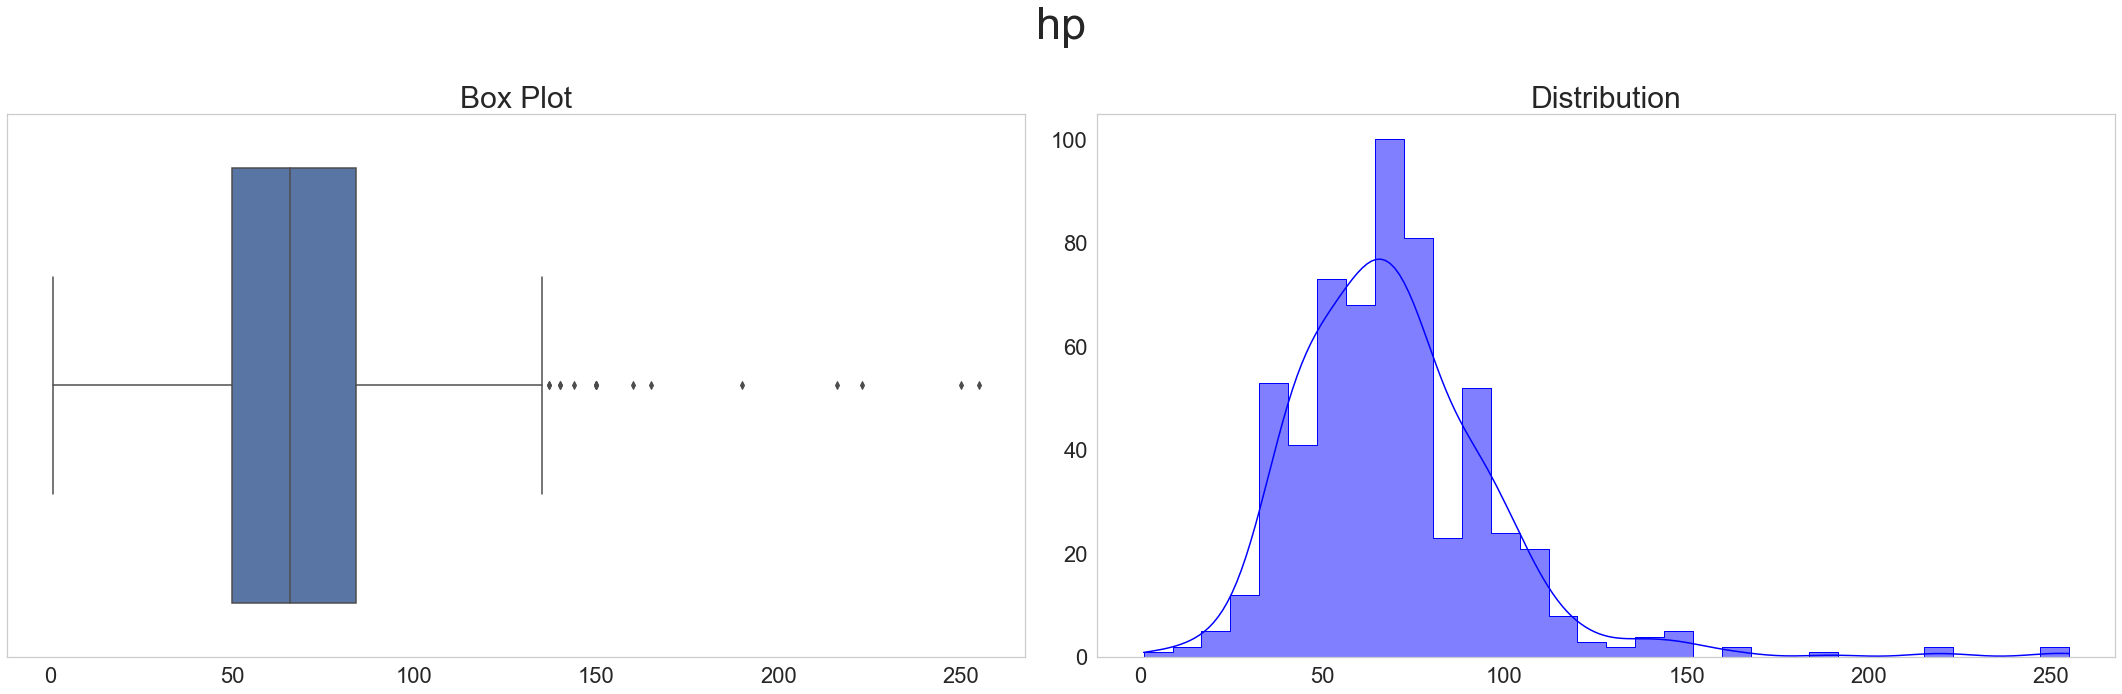

Summary Statistics for hp
count    585.000000
mean      70.044444
std       28.377556
min        1.000000
25%       50.000000
50%       66.000000
75%       84.000000
max      255.000000
Name: hp, dtype: float64


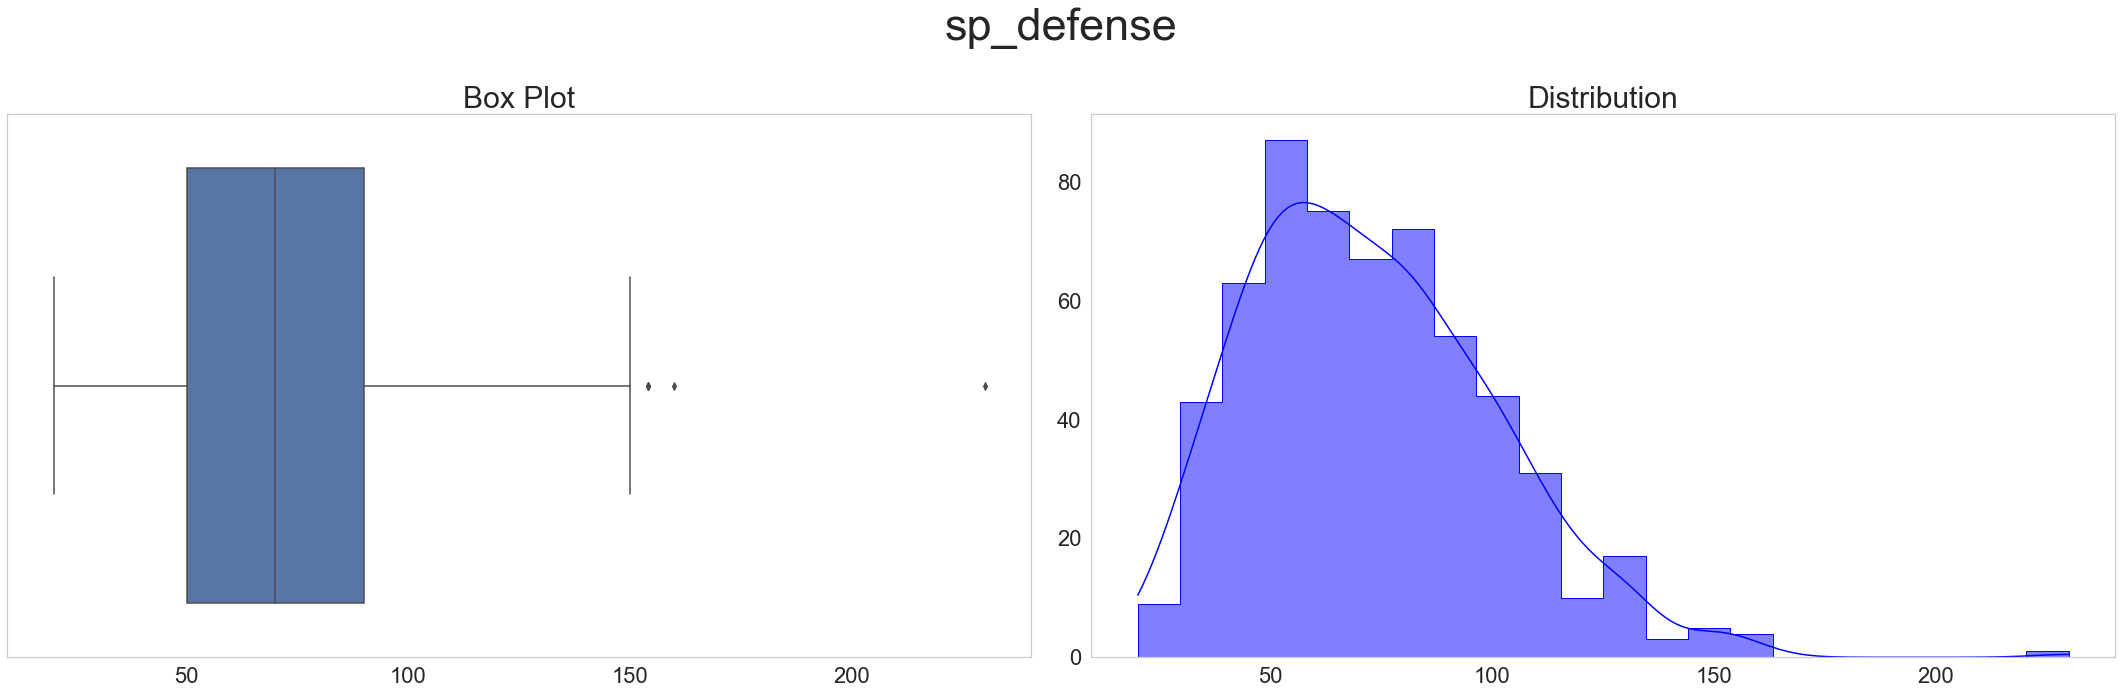

Summary Statistics for sp_defense
count    585.000000
mean      72.904274
std       28.299906
min       20.000000
25%       50.000000
50%       70.000000
75%       90.000000
max      230.000000
Name: sp_defense, dtype: float64


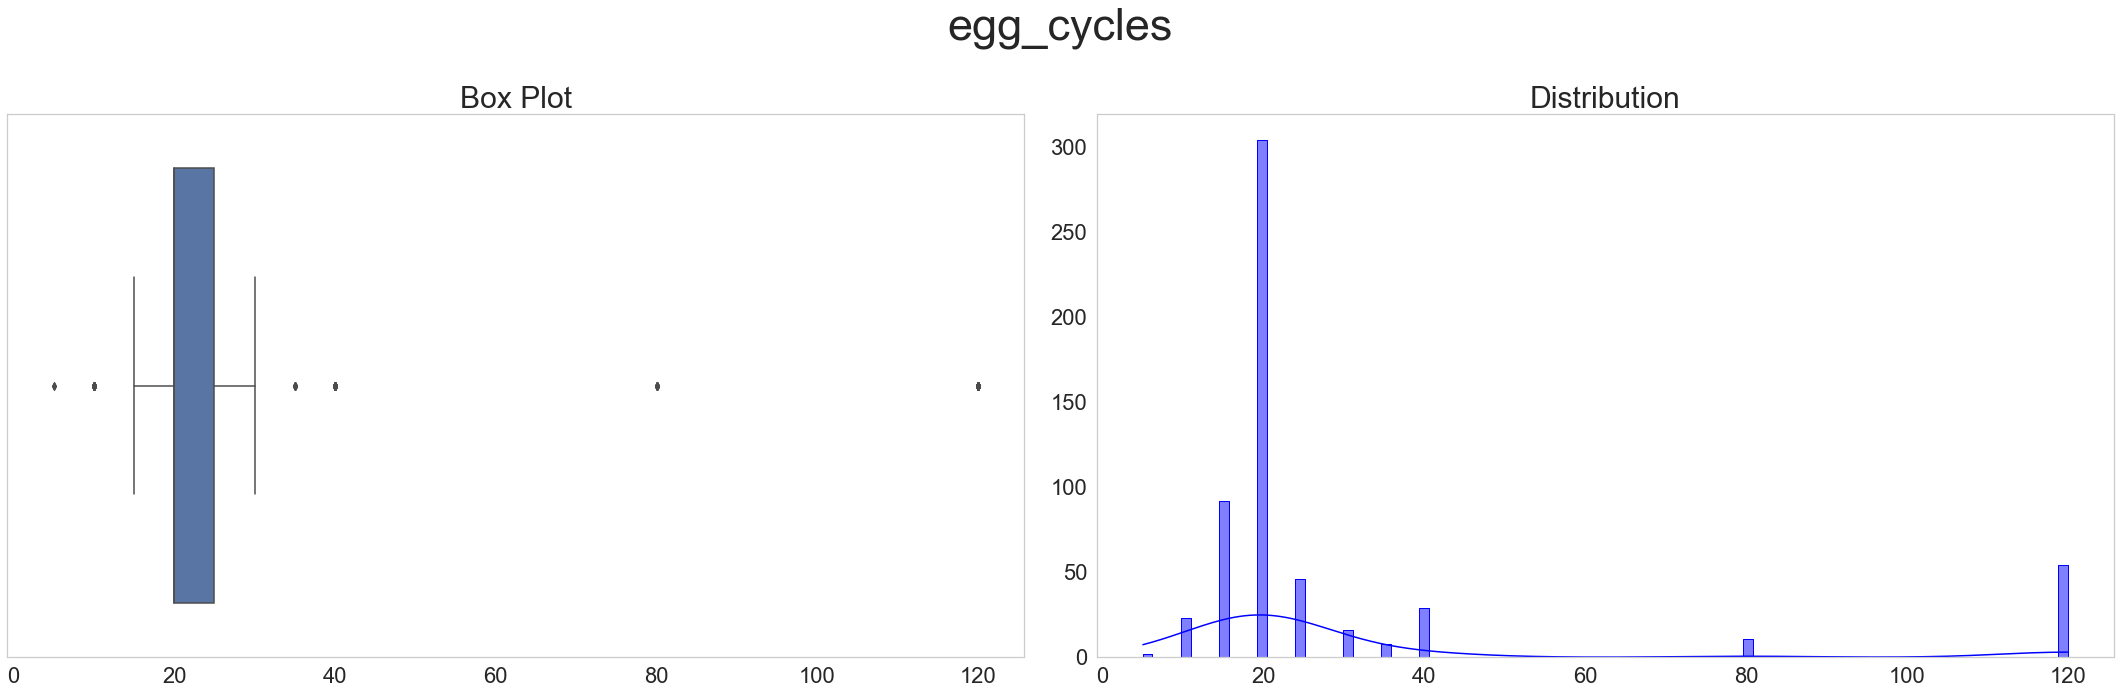

Summary Statistics for egg_cycles
count    585.000000
mean      30.991453
std       30.128860
min        5.000000
25%       20.000000
50%       20.000000
75%       25.000000
max      120.000000
Name: egg_cycles, dtype: float64


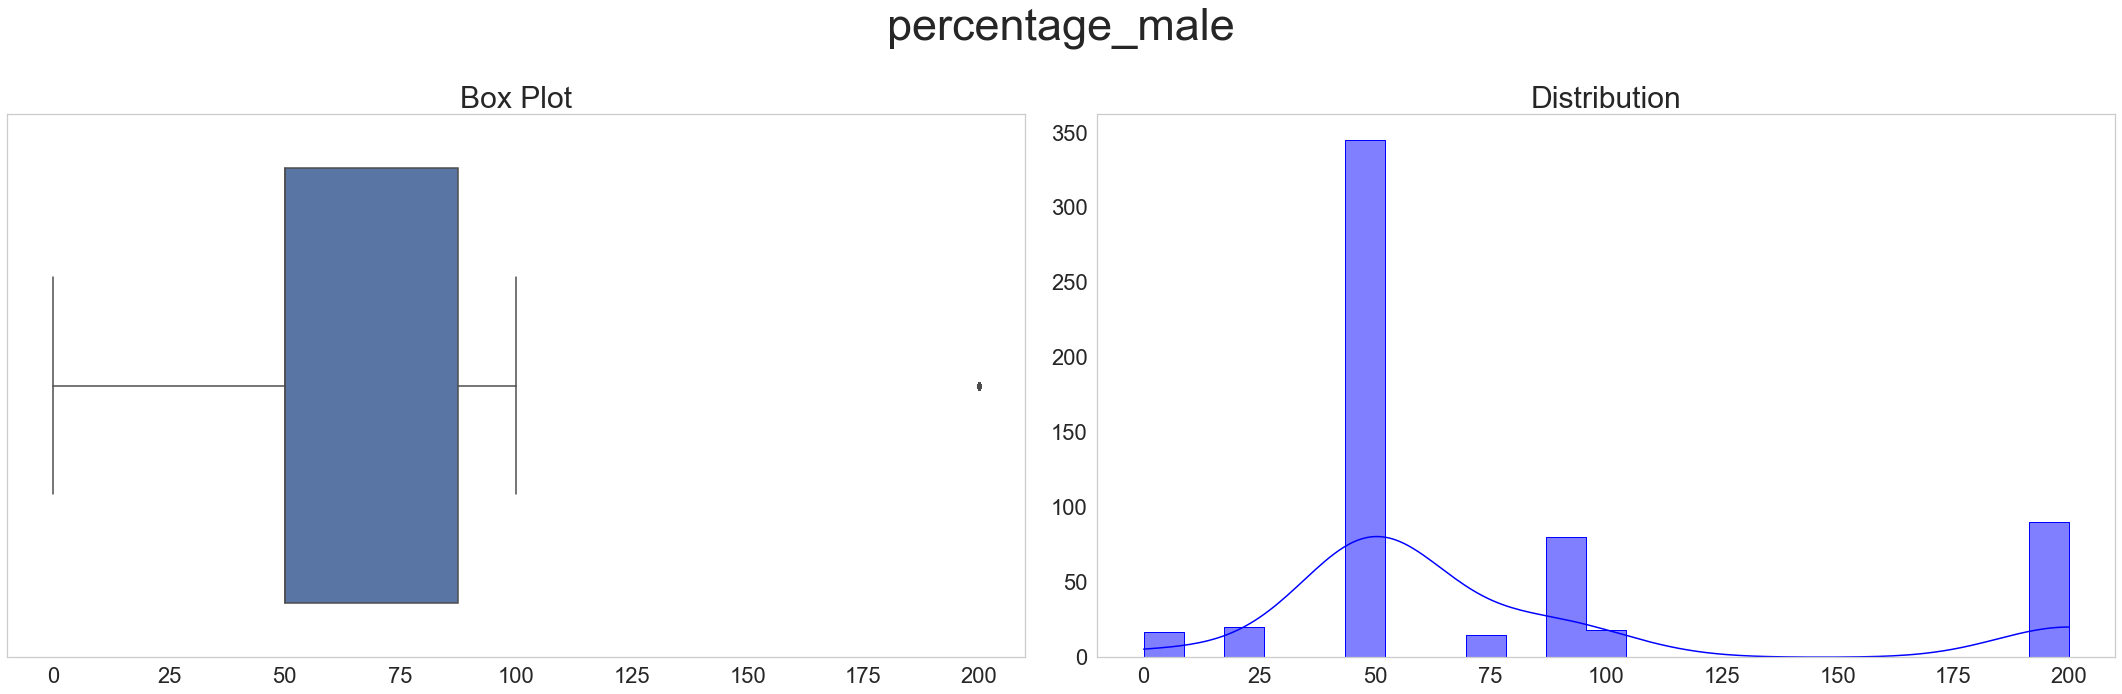

Summary Statistics for percentage_male
count    585.000000
mean      78.076923
std       55.296702
min        0.000000
25%       50.000000
50%       50.000000
75%       87.500000
max      200.000000
Name: percentage_male, dtype: float64


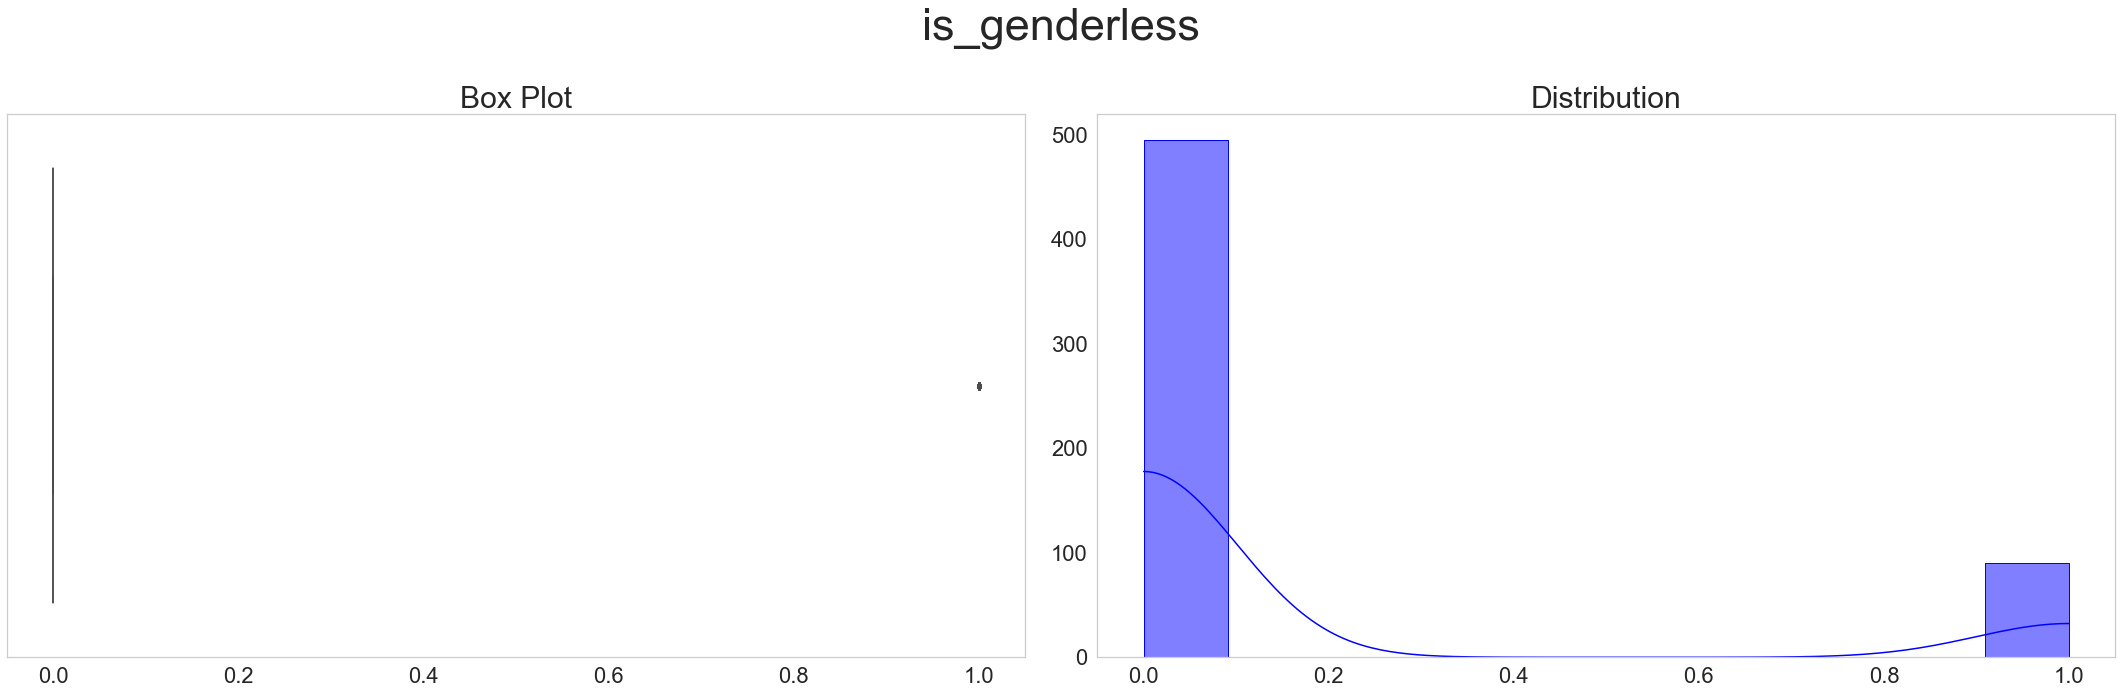

Summary Statistics for is_genderless
count    585.000000
mean       0.153846
std        0.361110
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: is_genderless, dtype: float64


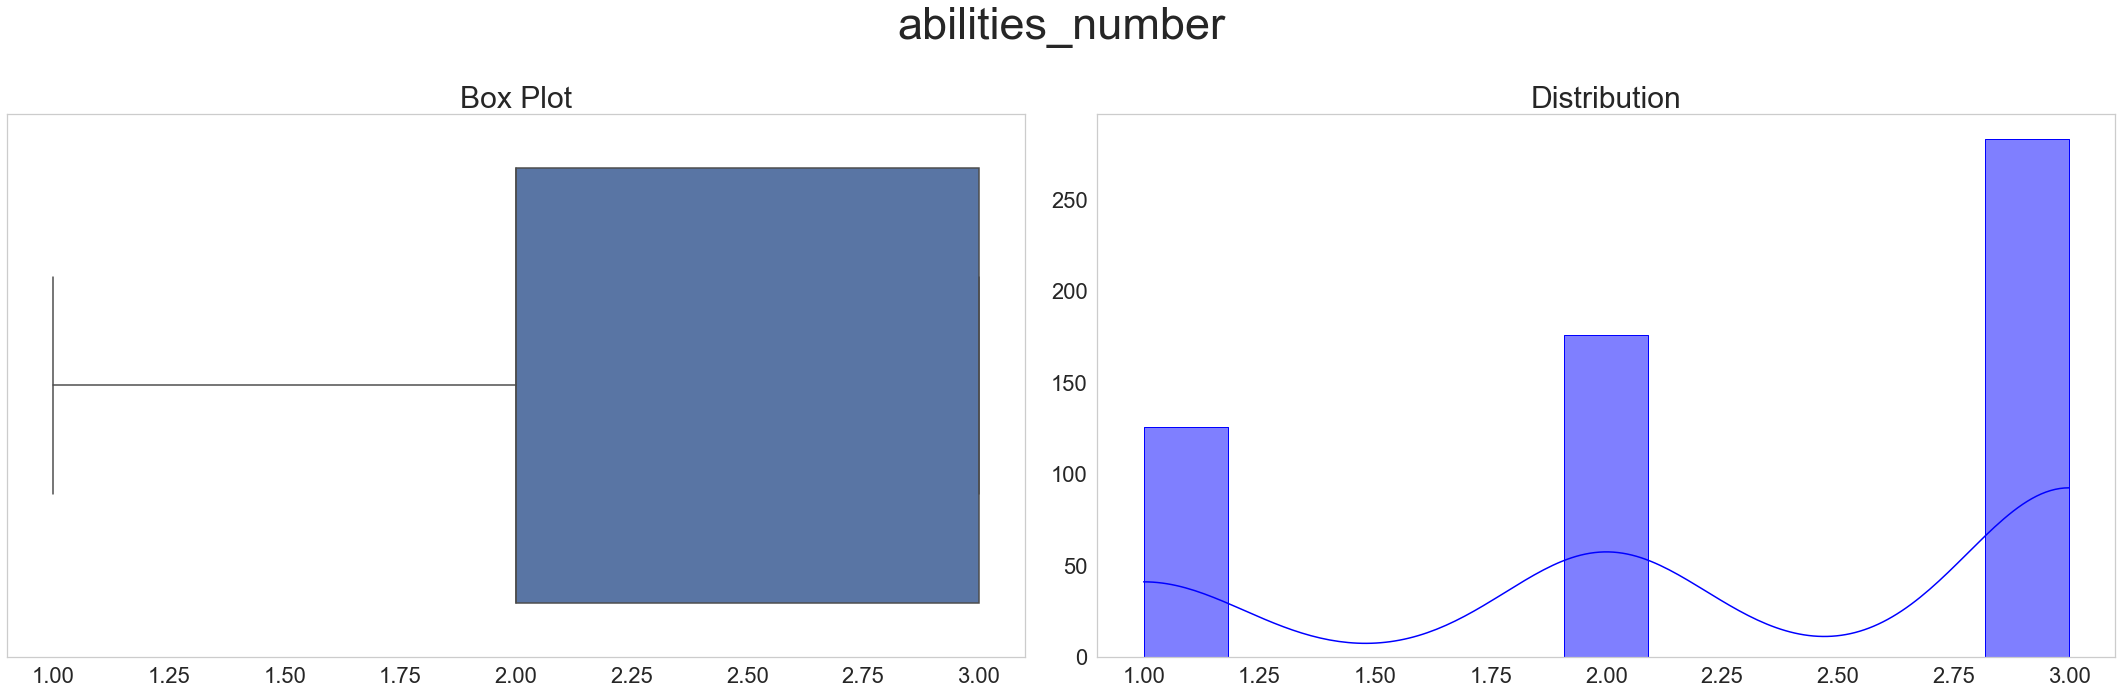

Summary Statistics for abilities_number
count    585.000000
mean       2.268376
std        0.792587
min        1.000000
25%        2.000000
50%        2.000000
75%        3.000000
max        3.000000
Name: abilities_number, dtype: float64


In [12]:
for i in univariate_stuff:
    explore_univariate(train, i)
    print(f'Summary Statistics for {i}\n{train[i].describe()}')

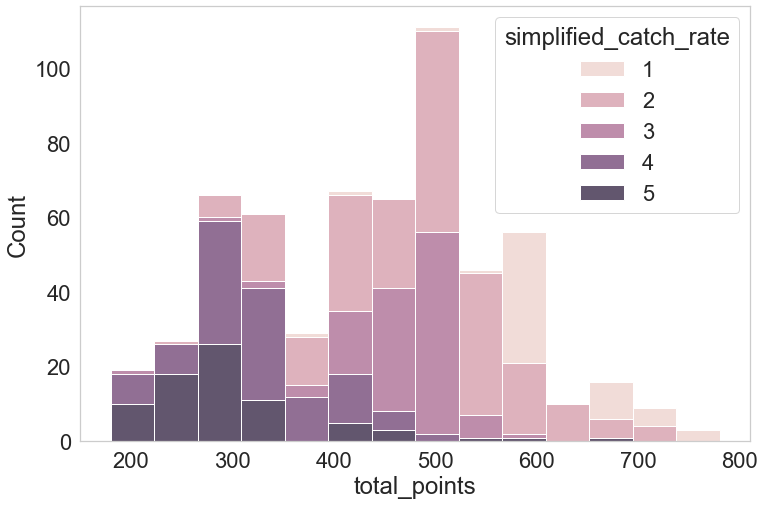

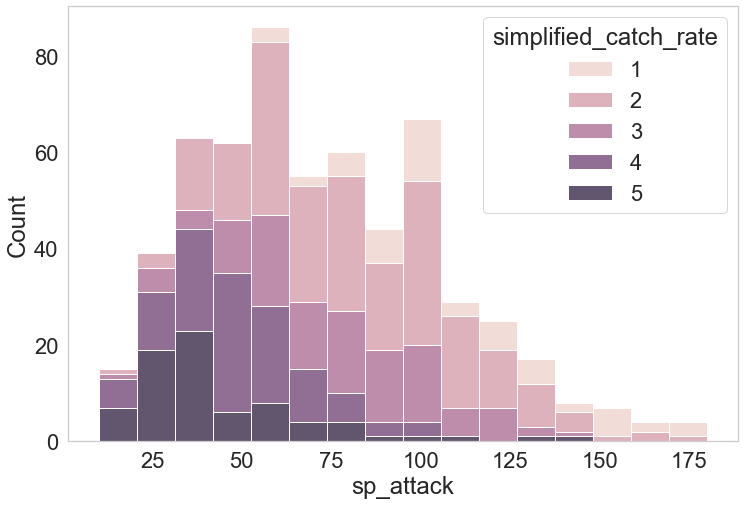

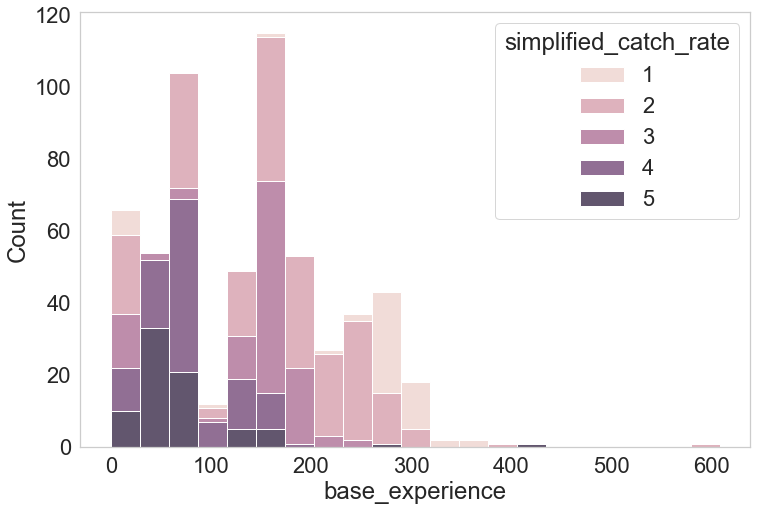

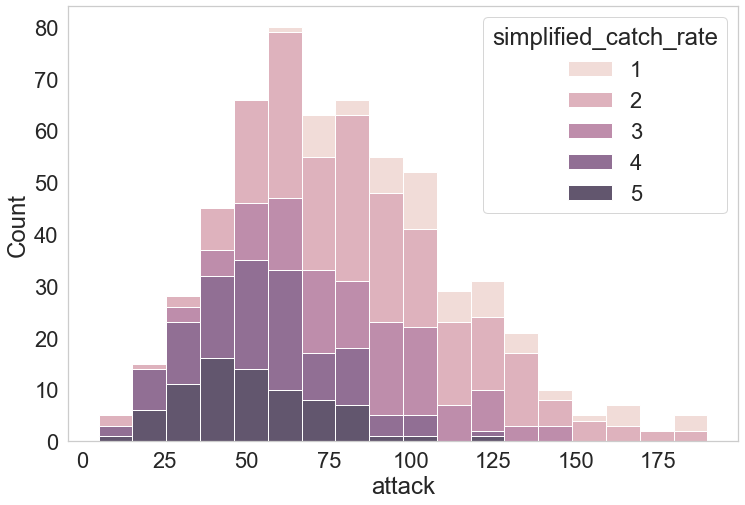

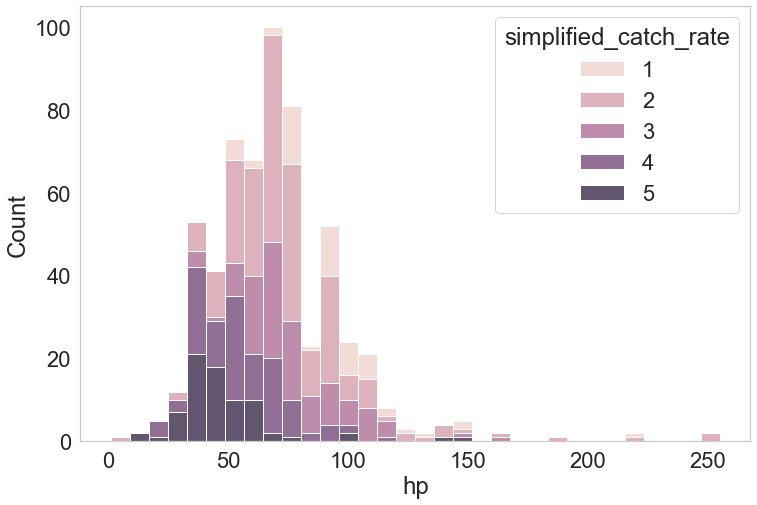

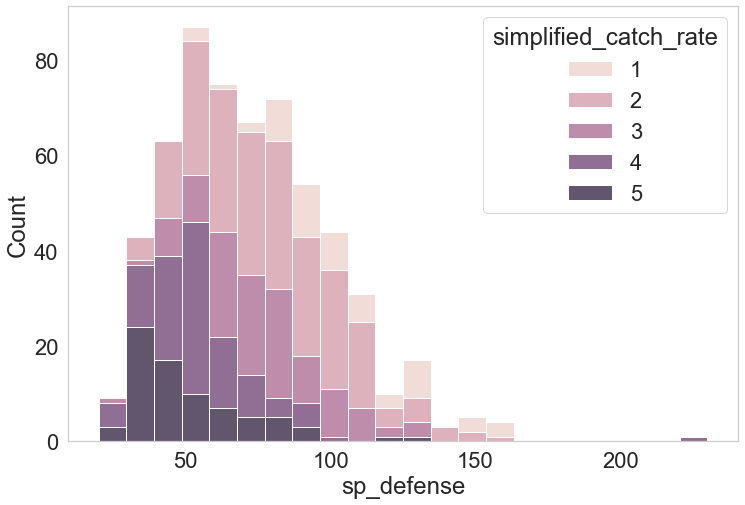

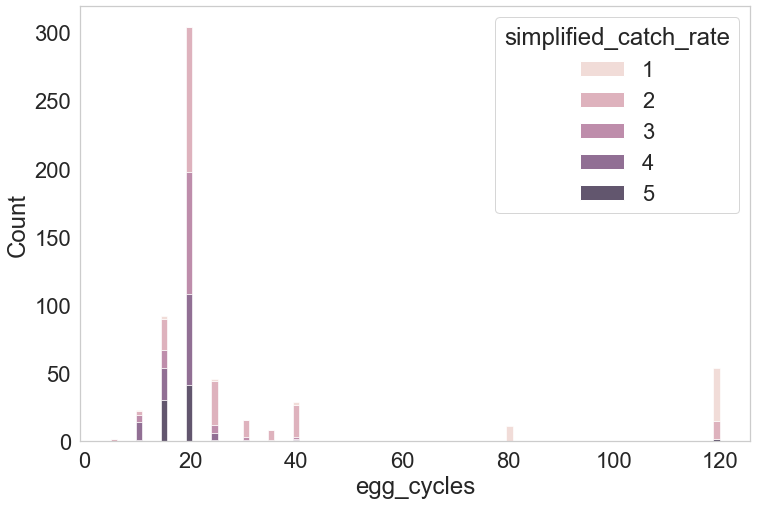

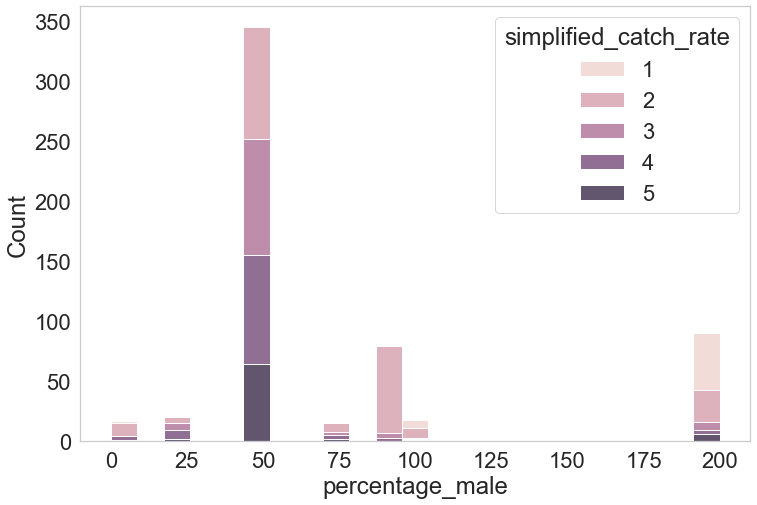

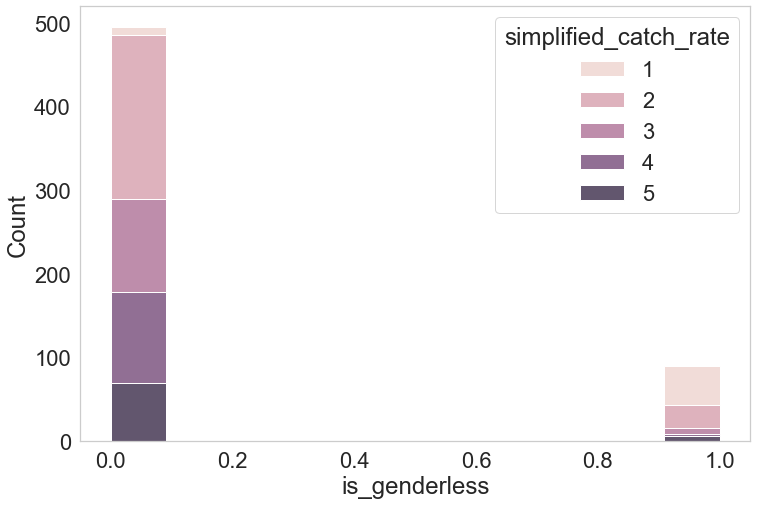

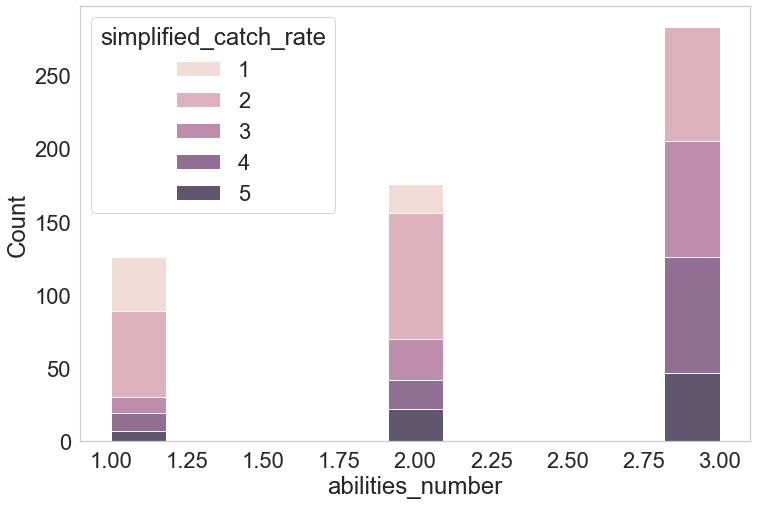

In [13]:
for i in univariate_stuff:
    histplot(train, i, 'simplified_catch_rate')

In [14]:
# plt.figure(figsize=(16,8))
# sns.scatterplot(x='total_points',y='attack',data=train,hue='simplified_catch_rate', palette='nipy_spectral')
# plt.title('Total Pts and Attack', fontsize = 20)
# plt.show()

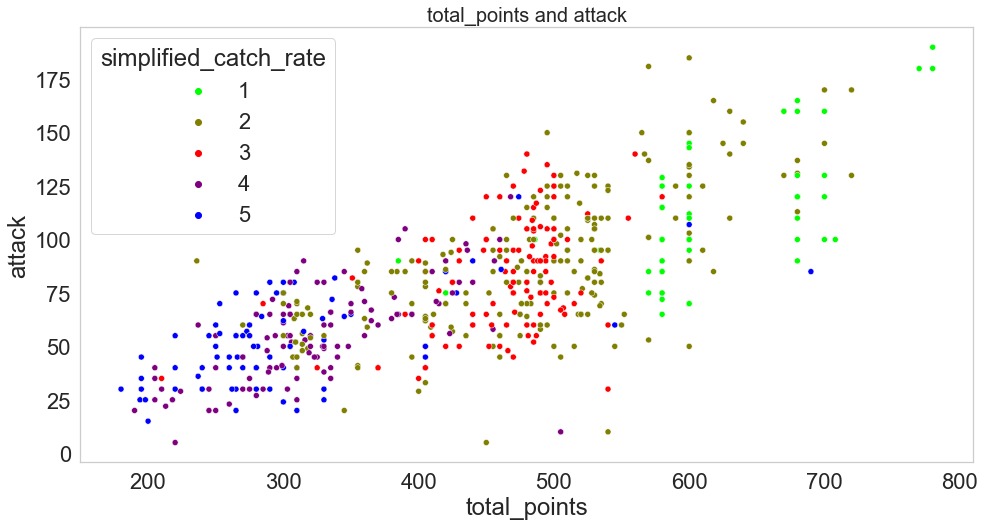

In [15]:
scatterplot(train,'total_points','attack')

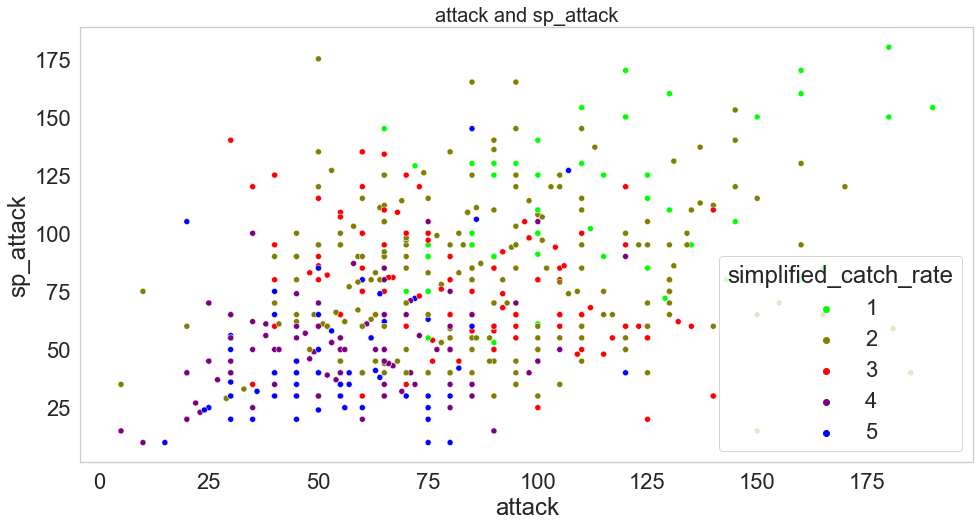

In [16]:
scatterplot(train, 'attack','sp_attack')

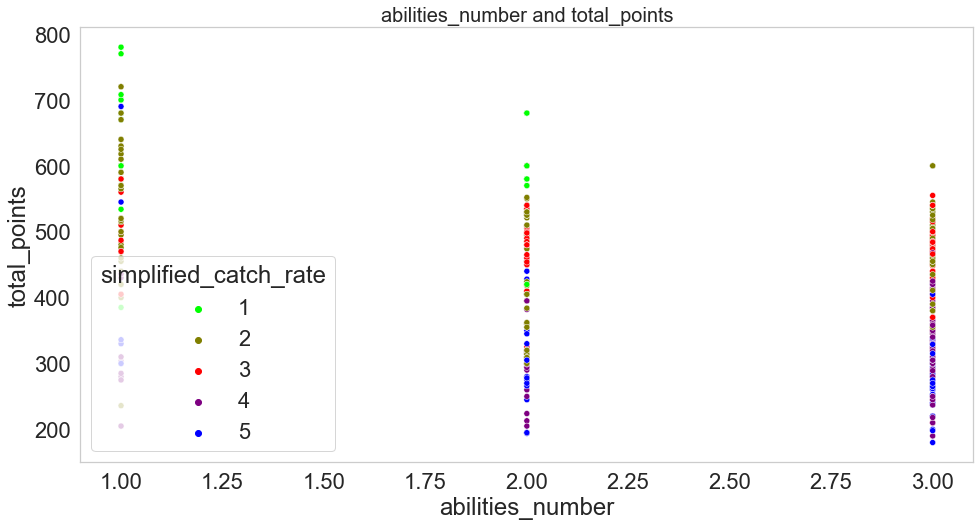

In [17]:
scatterplot(train, 'abilities_number','total_points')

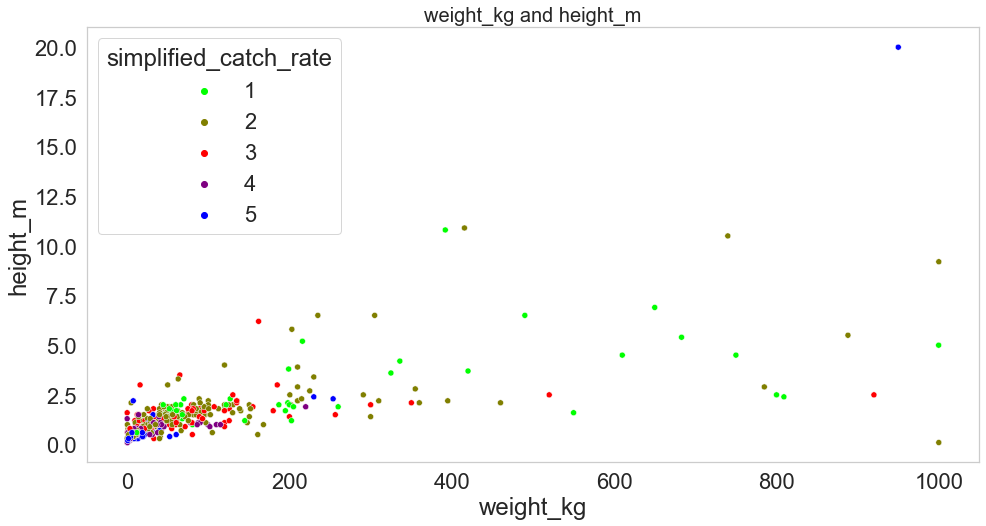

In [18]:
scatterplot(train, 'weight_kg','height_m')

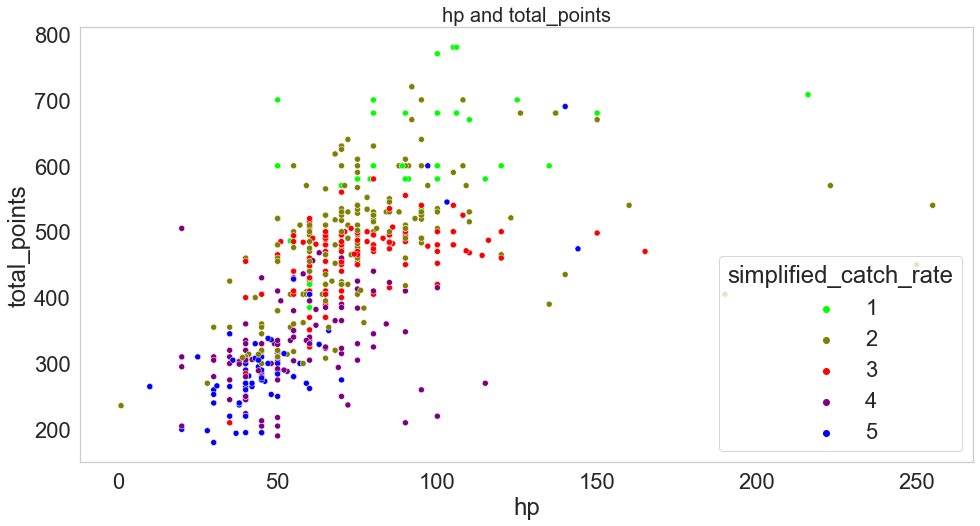

In [19]:
scatterplot(train, 'hp','total_points')

In [20]:
obj_cols = get_object_cols(df)

In [21]:
num_cols = get_numeric_X_cols(X_train, obj_cols)

In [22]:
X_train_scaled, X_validate_scaled, X_test_scaled = standard_scale_data(X_train[num_cols], X_validate[num_cols], X_test[num_cols])

In [23]:
X_train_scaled

,pokedex_number,generation,type_number,height_m,weight_kg,abilities_number,total_points,hp,attack,defense,...,against_steel,against_fairy,is_genderless,ability_1_num,ability_2_num,ability_hidden_num,status_num,primary_num,secondary_num,growth_num
457,-0.168710,-0.430981,0.919470,0.506805,-0.090218,-1.601669,1.313185,0.351125,0.325724,0.217509,...,0.029889,1.788616,-0.426401,-0.898563,-0.634866,-0.956600,1.246748,1.299481,-0.073952,-0.100789
577,0.218691,0.012119,-1.087583,-0.671081,-0.507329,-1.601669,1.150326,0.174779,1.381645,-0.110944,...,0.029889,-0.166247,2.345208,-0.898563,-0.634866,-0.956600,1.246748,-0.595220,-0.713292,-0.100789
712,0.701983,0.455219,0.919470,-0.463219,-0.418597,0.923874,-0.559691,-0.354260,-1.182735,-0.439397,...,-0.941517,-1.143679,-0.426401,-0.275958,-0.164276,-0.779644,-0.335351,0.667914,2.270294,0.766295
562,0.184170,0.012119,0.919470,0.853242,1.523731,0.923874,0.743179,1.409203,1.532491,0.217509,...,1.972702,-0.166247,-0.426401,-0.476798,0.575224,-0.223496,-0.335351,1.720525,0.139161,-0.100789
433,-0.245423,-0.430981,-1.087583,-0.393931,-0.392047,0.923874,-1.129697,-0.706953,-0.881043,-0.767849,...,1.972702,-0.166247,-0.426401,-0.617386,-0.265117,0.155696,-0.335351,1.720525,-0.713292,-0.967874
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,-0.721044,-0.874081,-1.087583,0.091080,-0.174059,0.923874,0.132458,-0.706953,0.476570,0.710188,...,0.029889,1.788616,-0.426401,-0.737890,-0.399571,0.206254,-0.335351,0.878436,-0.713292,-0.967874
656,0.498694,0.455219,0.919470,0.021793,0.139647,-0.338898,0.824608,1.232857,-1.484426,1.038640,...,-0.941517,-1.143679,-0.426401,0.326563,-0.634866,1.141594,-0.335351,-0.174176,-0.073952,0.766295
449,-0.191724,-0.430981,0.919470,-0.047494,0.905400,-0.338898,-0.152544,-0.354260,-0.126814,0.874414,...,-0.941517,-1.143679,2.345208,-0.557134,-0.634866,0.711843,-0.335351,1.931048,-0.073952,-0.100789
967,1.557334,1.784519,-1.087583,-0.463219,-0.467505,0.923874,-1.373985,-0.989107,-1.182735,-0.603623,...,0.029889,-0.166247,-0.426401,0.366731,1.314723,0.459049,-0.335351,-1.016265,-0.713292,-0.967874


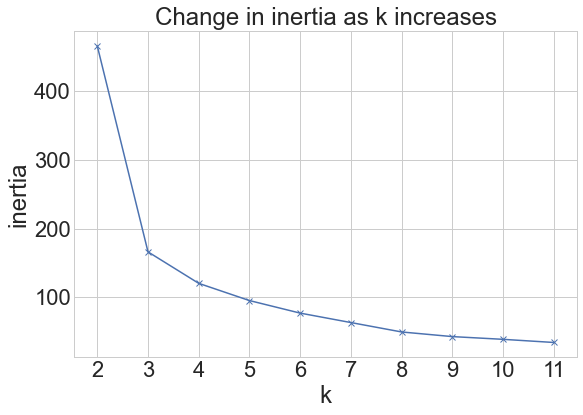

In [24]:
#Let's look at total points and egg cycles
X = X_train_scaled[['total_points', 'egg_cycles']]
inertia(X)

Clusters based on total_points and egg_cycles of Pokemon


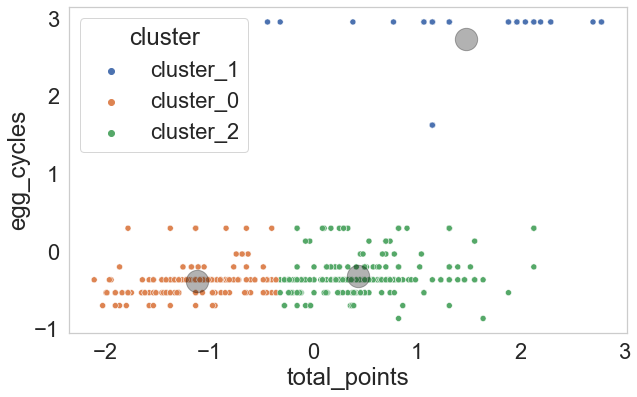

In [25]:
make_cluster(X_train_scaled, X, 3, 'total_points','egg_cycles')

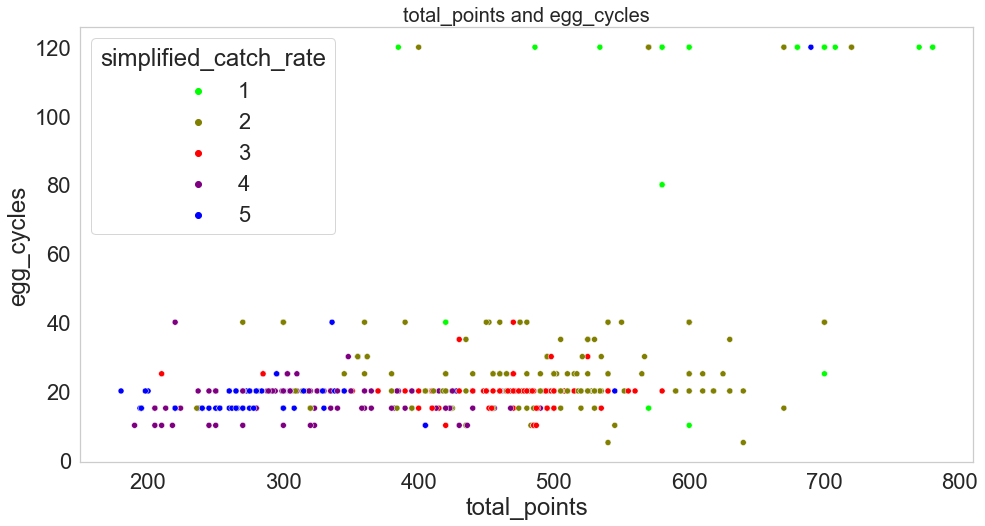

In [26]:
scatterplot(train, 'total_points','egg_cycles')

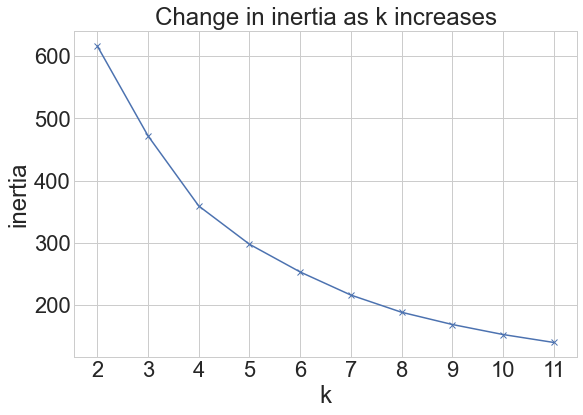

In [27]:
X = X_train_scaled[['defense', 'attack']]
inertia(X)

Clusters based on defense and attack of Pokemon


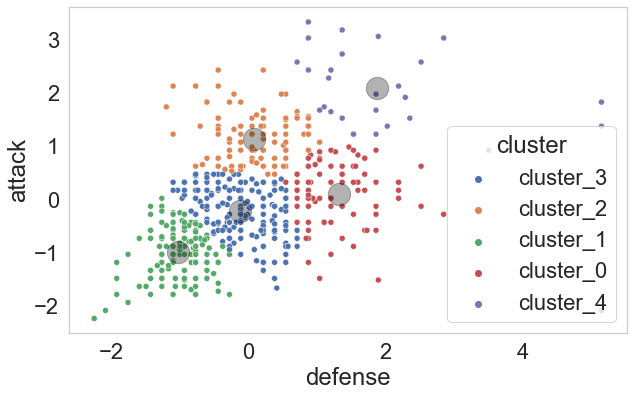

In [28]:
make_cluster(X_train_scaled, X, 5, 'defense','attack')

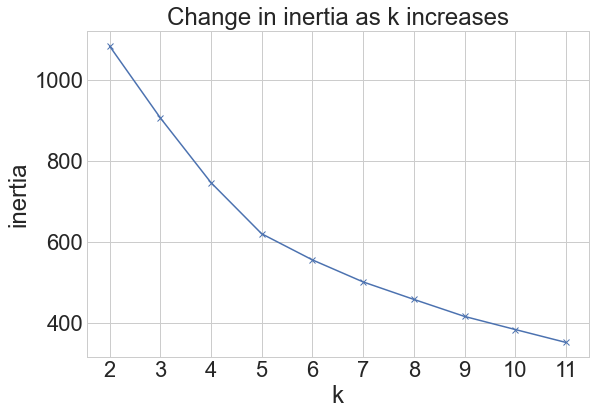

In [29]:
X = X_train_scaled[['defense', 'attack','hp']]
inertia(X)

In [30]:
#choosing 5 
kmeans = KMeans(n_clusters=5)

# fit the thing
kmeans.fit(X)

# Use (predict using) the thing 
kmeans.predict(X)

#make column called cluster_house_basics
X_train_scaled['poke_stats'] = kmeans.predict(X)

#centroids
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)

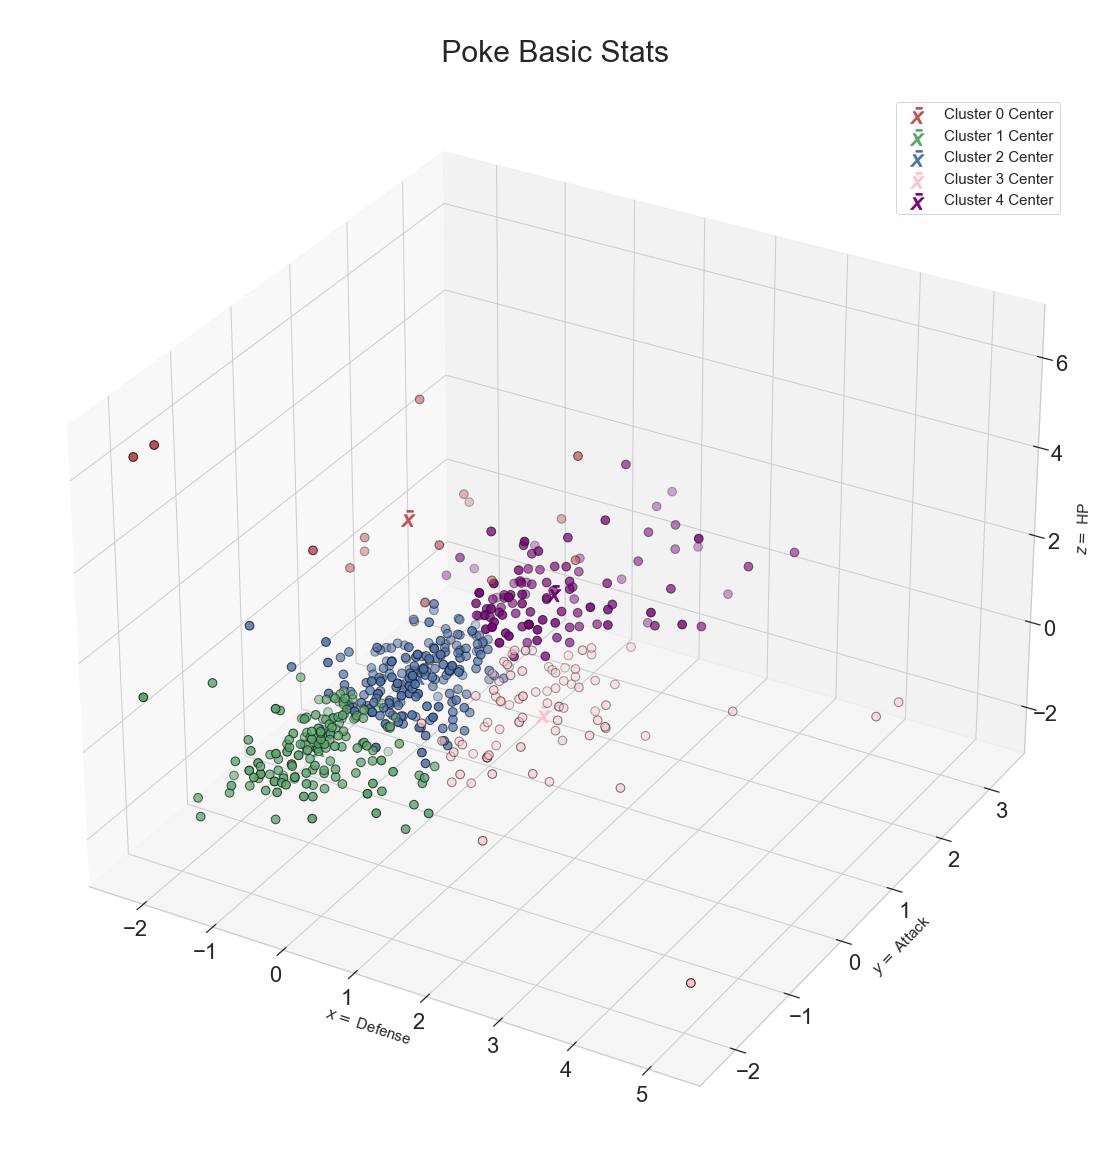

In [34]:
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111, projection='3d')

# set x for each cluster
x0 = X_train_scaled[X_train_scaled['poke_stats'] == 0]['defense']
x1 = X_train_scaled[X_train_scaled['poke_stats'] == 1]['defense']
x2 = X_train_scaled[X_train_scaled['poke_stats'] == 2]['defense']
x3 = X_train_scaled[X_train_scaled['poke_stats'] == 3]['defense']
x4 = X_train_scaled[X_train_scaled['poke_stats'] == 4]['defense']


# set y for each cluster
y0 = X_train_scaled[X_train_scaled['poke_stats'] == 0]['attack']
y1 = X_train_scaled[X_train_scaled['poke_stats'] == 1]['attack']
y2 = X_train_scaled[X_train_scaled['poke_stats'] == 2]['attack']
y3 = X_train_scaled[X_train_scaled['poke_stats'] == 3]['attack']
y4 = X_train_scaled[X_train_scaled['poke_stats'] == 4]['attack']

# set z for each cluster
z0 = X_train_scaled[X_train_scaled['poke_stats'] == 0]['hp']
z1 = X_train_scaled[X_train_scaled['poke_stats'] == 1]['hp']
z2 = X_train_scaled[X_train_scaled['poke_stats'] == 2]['hp']
z3 = X_train_scaled[X_train_scaled['poke_stats'] == 3]['hp']
z4 = X_train_scaled[X_train_scaled['poke_stats'] == 4]['hp']

#centroids
zero_center = centroids[centroids.index == 0]
one_center = centroids[centroids.index == 1]
two_center = centroids[centroids.index == 2]
three_center = centroids[centroids.index == 3]
four_center = centroids[centroids.index == 4]

# plot cluster 0 with center
ax.scatter(x0, y0, z0, s=75, c='r', edgecolor='k', marker='o')
ax.scatter(zero_center.defense, zero_center.attack, zero_center.hp, s=250, c='r', marker='$\\bar{x}$', label='Cluster 0 Center')
# plot cluster 1 with center
ax.scatter(x1, y1, z1, s=75, c='g', edgecolor='k', marker='o')
ax.scatter(one_center.defense, one_center.attack, one_center.hp, s=250, c='g', marker='$\\bar{x}$', label='Cluster 1 Center')
# plot cluster 2 with center
ax.scatter(x2, y2, z2, s=75, c='b', edgecolor='k', marker='o')
ax.scatter(two_center.defense, two_center.attack, two_center.hp, s=250, c='b', marker='$\\bar{x}$', label='Cluster 2 Center')
#plot cluster 3 with center
ax.scatter(x3, y3, z3, s=75, c='pink', edgecolor='k', marker='o')
ax.scatter(three_center.defense, three_center.attack, three_center.hp, s=250, c='pink', marker='$\\bar{x}$', label='Cluster 3 Center')
#plot cluster 4 with center
ax.scatter(x4, y4, z4, s=75, c='purple', edgecolor='k', marker='o')
ax.scatter(four_center.defense, four_center.attack, four_center.hp, s=250, c='purple', marker='$\\bar{x}$', label='Cluster 4 Center')
# set labels and title
ax.set_xlabel('\n$x =$ Defense', fontsize=15)
ax.set_ylabel('\n$y =$ Attack', fontsize=15)
ax.set_zlabel('\n$z =$ HP', fontsize=15)
plt.title('\n Poke Basic Stats', fontsize=30)
plt.legend(bbox_to_anchor=(0.975,0.975), fontsize=15)
plt.show()

In [32]:
# train['poke_stats'] = kmeans.predict(X)
# train

# Premature Modeling 

In [35]:
x_col = ['total_points', 'sp_attack','base_experience', 'sp_defense', 'percentage_male']
y_col = 'simplified_catch_rate'

In [36]:
#using only our features
X_train, y_train = train[x_col], train[y_col]

X_validate, y_validate = validate[x_col], validate[y_col]

X_test, y_test = test[x_col], test[y_col]

In [37]:
#since the most common value is 2 (the hard category) that will be our baseline
y_train.value_counts()

2    223
3    118
4    111
5     76
1     57
Name: simplified_catch_rate, dtype: int64

In [40]:
train['baseline_prediction'] = 2
round(accuracy_score(train.simplified_catch_rate, train.baseline_prediction),2)

0.38

In [41]:
baseline_score = round(accuracy_score(train.simplified_catch_rate, train.baseline_prediction),2)
print(f'Our baseline score is {baseline_score}')

Our baseline score is 0.38


### Decision Tree

In [62]:
tree = DecisionTreeClassifier(max_leaf_nodes=9, max_depth=5)
tree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5, max_leaf_nodes=9)

In [63]:
print(f'training score: {tree.score(X_train, y_train):.2%}')
print(f'validate score: {tree.score(X_validate, y_validate):.2%}')

training score: 67.69%
validate score: 63.35%


In [64]:
def get_metrics_binary(clf):
    '''
    get_metrics_binary takes in a confusion matrix (cnf) for a binary classifier and prints out metrics based on
    values in variables named X_train, y_train, and y_pred.
    
    return: a classification report as a transposed DataFrame
    '''
    X_train, y_train = train[x_col], train[y_col]

    X_validate, y_validate = validate[x_col], validate[y_col]

    X_test, y_test = test[x_col], validate[y_col]
    
    accuracy = clf.score(X_train, y_train)
    class_report = pd.DataFrame(classification_report(y_train, y_pred, output_dict=True)).T
    conf = confusion_matrix(y_train, y_pred)
    tpr = conf[1][1] / conf[1].sum()
    fpr = conf[0][1] / conf[0].sum()
    tnr = conf[0][0] / conf[0].sum()
    fnr = conf[1][0] / conf[1].sum()
    print(f'''
    The accuracy for our model is {accuracy:.4}
    The True Positive Rate is {tpr:.3}, The False Positive Rate is {fpr:.3},
    The True Negative Rate is {tnr:.3}, and the False Negative Rate is {fnr:.3}
    ''')
    return class_report

In [66]:
y_pred = tree.predict(X_train)

In [67]:
get_metrics_binary(tree)


    The accuracy for our model is 0.6769
    The True Positive Rate is 0.686, The False Positive Rate is 0.105,
    The True Negative Rate is 0.895, and the False Negative Rate is 0.0628
    


,precision,recall,f1-score,support
1,0.761194,0.894737,0.822581,57.000000
2,0.768844,0.686099,0.725118,223.000000
3,0.625000,0.635593,0.630252,118.000000
4,0.557971,0.693694,0.618474,111.000000
5,0.655738,0.526316,0.583942,76.000000
accuracy,0.676923,0.676923,0.676923,0.676923
macro avg,0.673749,0.687288,0.676073,585.000000
weighted avg,0.684378,0.676923,0.676903,585.000000


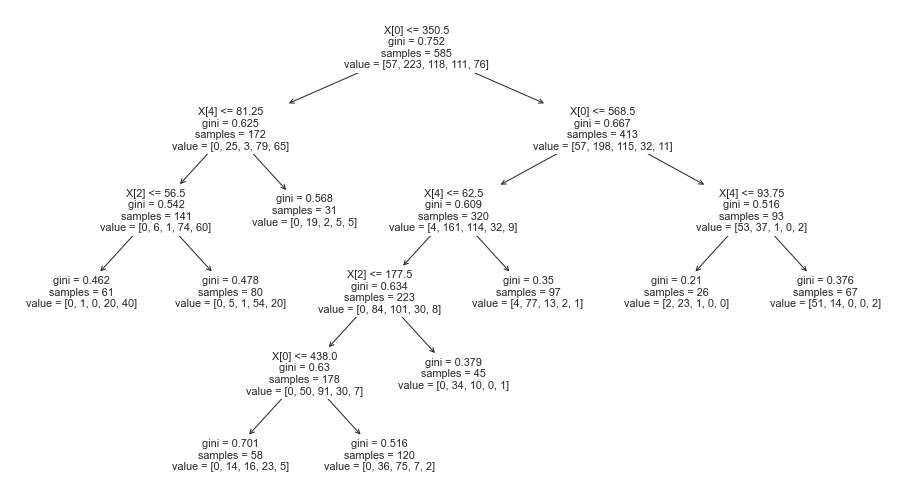

              precision    recall  f1-score   support

           1       0.76      0.89      0.82        57
           2       0.77      0.69      0.73       223
           3       0.62      0.64      0.63       118
           4       0.56      0.69      0.62       111
           5       0.66      0.53      0.58        76

    accuracy                           0.68       585
   macro avg       0.67      0.69      0.68       585
weighted avg       0.68      0.68      0.68       585



In [69]:
plt.figure(figsize=(16,9))
plot_tree(tree)
plt.show()

print(classification_report(y_train, y_pred))

In [97]:
tree_precision = round(sklearn.metrics.precision_score(y_train, y_pred, average='macro'),2)
tree_recall = round(sklearn.metrics.recall_score(y_train, y_pred, average='macro'),2)
print('Scores for Decision Tree!')
print('---------------------------')
print(f'Baseline score is {baseline_score}')
print(f'accuracy score is {round(sklearn.metrics.accuracy_score(y_train, y_pred),2)}')
print(f'precision score is {tree_precision}')
print(f'recall score is {tree_recall}')

Scores for Decision Tree!
---------------------------
Baseline score is 0.38
accuracy score is 0.68
precision score is 0.67
recall score is 0.69


<br>

### Logistic Regression

In [102]:
logit = LogisticRegression(C= 10, random_state =123)
logit.fit(X_train, y_train)
y_pred = logit.predict(X_train)
print(f'training score: {logit.score(X_train, y_train):.2%}')
print(f'validate score: {logit.score(X_validate, y_validate):.2%}')

training score: 37.78%
validate score: 34.26%


In [103]:
get_metrics_binary(logit)


    The accuracy for our model is 0.3778
    The True Positive Rate is 0.789, The False Positive Rate is 0.351,
    The True Negative Rate is 0.561, and the False Negative Rate is 0.0987
    


,precision,recall,f1-score,support
1,0.507937,0.561404,0.533333,57.000000
2,0.389381,0.789238,0.521481,223.000000
3,0.052632,0.008475,0.014599,118.000000
4,0.261905,0.099099,0.143791,111.000000
5,0.111111,0.013158,0.023529,76.000000
accuracy,0.377778,0.377778,0.377778,0.377778
macro avg,0.264593,0.294275,0.247347,585.000000
weighted avg,0.272668,0.377778,0.284038,585.000000


In [105]:
print('Scores for Logistic Regression!')
print('---------------------------')
print(f'Baseline score is {baseline_score}')
print(f'accuracy score is {round(sklearn.metrics.accuracy_score(y_train, y_pred),2)}')
print(f'precision score is {round(sklearn.metrics.precision_score(y_train, y_pred, pos_label =0,average="macro"),2)}')
print(f'recall score is {round(sklearn.metrics.recall_score(y_train, y_pred, pos_label =0, average="macro"),2)}')

Scores for Logistic Regression!
---------------------------
Baseline score is 0.38
accuracy score is 0.38
precision score is 0.26
recall score is 0.29


<br>

### KNN

In [120]:
knn = KNeighborsClassifier(n_neighbors = 6)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_train)
print(f'training score: {knn.score(X_train, y_train):.2%}')
print(f'validate score: {knn.score(X_validate, y_validate):.2%}')

training score: 71.28%
validate score: 65.74%


In [121]:
get_metrics_binary(knn)


    The accuracy for our model is 0.7128
    The True Positive Rate is 0.776, The False Positive Rate is 0.123,
    The True Negative Rate is 0.86, and the False Negative Rate is 0.0538
    


,precision,recall,f1-score,support
1,0.790323,0.859649,0.823529,57.000000
2,0.758772,0.775785,0.767184,223.000000
3,0.655738,0.677966,0.666667,118.000000
4,0.641667,0.693694,0.666667,111.000000
5,0.716981,0.500000,0.589147,76.000000
accuracy,0.712821,0.712821,0.712821,0.712821
macro avg,0.712696,0.701419,0.702639,585.000000
weighted avg,0.713414,0.712821,0.710197,585.000000


In [122]:
print('Scores for KNN!')
print('---------------------------')
print(f'Baseline score is {baseline_score}')
print(f'accuracy score is {round(sklearn.metrics.accuracy_score(y_train, y_pred),2)}')
print(f'precision score is {round(sklearn.metrics.precision_score(y_train, y_pred, pos_label =0, average="macro"),2)}')
print(f'recall score is {round(sklearn.metrics.recall_score(y_train, y_pred, pos_label =0, average="macro"),2)}')

Scores for KNN!
---------------------------
Baseline score is 0.38
accuracy score is 0.71
precision score is 0.71
recall score is 0.7


In [123]:
actual_test = y_test
predicted_test = knn.predict(X_test)
print(classification_report(actual_test, predicted_test))

              precision    recall  f1-score   support

           1       0.68      0.95      0.79        20
           2       0.73      0.66      0.69        79
           3       0.61      0.65      0.63        43
           4       0.59      0.65      0.62        40
           5       0.55      0.41      0.47        27

    accuracy                           0.65       209
   macro avg       0.63      0.66      0.64       209
weighted avg       0.65      0.65      0.65       209



In [ ]:
print(f'training score: {knn.score(X_train, y_train):.2%}')
print(f'validate score: {knn.score(X_validate, y_validate):.2%}')
print(f'test score: {tree.score(X_test, y_test):.2%}')